In [539]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [540]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

data_path = "data/predicting-sales-quantity-in-our-dynamic-gridworld"

In [541]:
train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")
sup = pd.read_csv(f"{data_path}/supplemental_cities.csv")

train = pd.merge(train, sup, on="city_id")
test = pd.merge(test, sup, on="city_id")

In [542]:
train["type"] = 0
test["type"] = 1
all_data = pd.concat([train, test], axis=0)

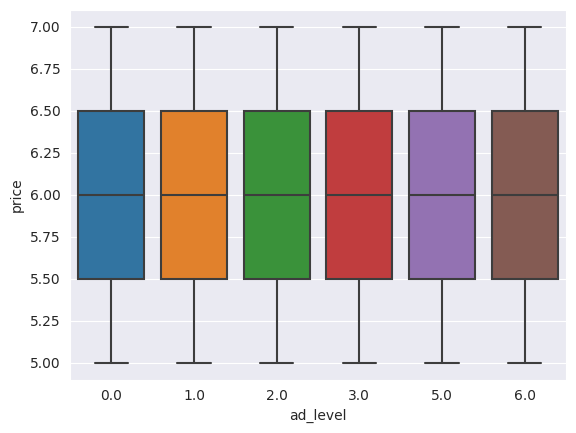

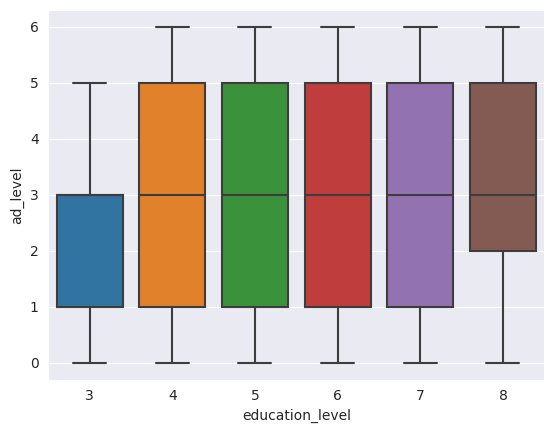

In [543]:
sns.boxplot(y=all_data["price"], x=all_data["ad_level"])
plt.show()
sns.boxplot(y=all_data["ad_level"], x=all_data["education_level"])
plt.show()

In [544]:
all_data["price"].fillna(6.0, inplace=True)
all_data["ad_level"].fillna(3.0, inplace=True)

all_data["population"] = all_data["population"].fillna(train["population"].mean())
all_data["median_income"] = all_data["median_income"].fillna(train["median_income"].mean())

all_data["ad_level"] += 1

In [545]:
all_data["no_stores"] = all_data.groupby("city_id").transform("size")

all_data["x"] = all_data["city_id"].str.split("/").str[0]
all_data["x"] = all_data["x"].astype(int) + 1
all_data["y"] = all_data["city_id"].str.split("/").str[1]
all_data["y"] = all_data['y'].astype(int) + 1
all_data["length"] = (all_data["x"] ** 2 + all_data["y"] ** 2) ** 0.5
all_data["cos"] = all_data["x"] / all_data["length"]
all_data["city_nr"] = all_data["city_id"].str.split("/").str[2]
all_data["city_nr"] = all_data["city_nr"].astype(int)

all_data["education_to_population_ratio"] = all_data["education_level"] / all_data["population"]
all_data["population_education_product"] = all_data["population"] * all_data["education_level"]

all_data["price_ad_interaction"] = all_data["price"] * all_data["ad_level"]
all_data["price_population_interaction"] = all_data["price"] * all_data["population"]
all_data["price_education_interaction"] = all_data["price"] * all_data["education_level"]
all_data["price_income_interaction"] = all_data["price"] * all_data["median_income"]

all_data["mean_price_ad_interaction"] = all_data.groupby("city_id")["price_ad_interaction"].transform("mean")
all_data["mean_price_population_interaction"] = all_data.groupby("city_id")["price_population_interaction"].transform(
    "mean")
all_data["mean_price_education_interaction"] = all_data.groupby("city_id")["price_education_interaction"].transform(
    "mean")
all_data["mean_price_income_interaction"] = all_data.groupby("city_id")["price_income_interaction"].transform("mean")

all_data["mean_price"] = all_data.groupby("city_id")["price"].transform("mean")
all_data["mean_ad_level"] = all_data.groupby("city_id")["ad_level"].transform("mean")
all_data["mean_quantity"] = all_data.groupby("city_id")["quantity"].transform("mean")

In [546]:
cities_df = all_data.copy()
cities_df.drop_duplicates("city_id", inplace=True)
test_cities = cities_df[cities_df["type"] == 1][["city_id"]]
cities_df.shape

(20972, 29)

In [547]:
drop_list = ["id", "city_id", "store_id", "ad_level", "price", "quantity", "price_ad_interaction",
             "price_population_interaction", "price_education_interaction", "price_income_interaction"]
cities_df.drop(columns=drop_list, inplace=True)
cities_df

,population,education_level,median_income,type,no_stores,x,y,length,cos,city_nr,education_to_population_ratio,population_education_product,mean_price_ad_interaction,mean_price_population_interaction,mean_price_education_interaction,mean_price_income_interaction,mean_price,mean_ad_level,mean_quantity
0,9868.0,5,1478.732661,0,1,1,1,1.414214,0.707107,0,0.000507,49340.0,42.00,59208.00,30.000,8872.395966,6.000,7.0,2240.0
1,7446.0,6,1612.926622,0,1,1,5,5.099020,0.196116,0,0.000806,44676.0,24.00,44676.00,36.000,9677.559731,6.000,4.0,2558.0
2,2029.0,5,1403.120891,0,1,1,10,10.049876,0.099504,1,0.002464,10145.0,15.75,10652.25,26.250,7366.384678,5.250,3.0,2316.0
3,4418.0,6,1555.556995,0,1,1,12,12.041595,0.083045,0,0.001358,26508.0,37.50,27612.50,37.500,9722.231216,6.250,6.0,2276.0
4,3932.0,5,1431.114759,0,1,1,14,14.035669,0.071247,0,0.001272,19660.0,18.00,23592.00,30.000,8586.688555,6.000,3.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14386,2706.0,6,1594.663641,1,1,150,140,205.182845,0.731055,0,0.002217,16236.0,36.75,14206.50,31.500,8371.984116,5.250,7.0,NaN
14387,2191.0,6,1434.542613,1,1,150,142,206.552657,0.726207,0,0.002738,13146.0,21.00,15337.00,42.000,10041.798294,7.000,3.0,NaN
14388,3533.0,6,1949.245987,1,1,150,143,207.241405,0.723794,0,0.001698,21198.0,5.25,18548.25,31.500,10233.541432,5.250,1.0,NaN
14389,36085.0,6,1956.846461,1,1,150,146,209.322717,0.716597,1,0.000166,216510.0,42.00,216510.00,36.000,11741.078767,6.000,7.0,NaN


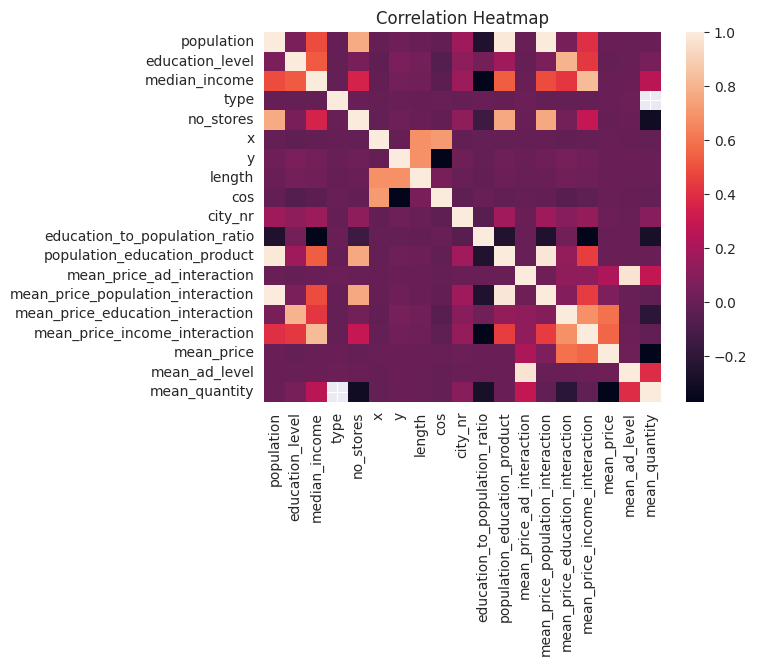

In [548]:
sns.heatmap(cities_df.corr(numeric_only=True), robust=True)
plt.title("Correlation Heatmap")
plt.show()

In [549]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras import Sequential, layers

In [550]:
mean_quantity_df = cities_df[["mean_quantity"]]
cities_df.drop(columns="mean_quantity", inplace=True)

In [551]:
scaler = MinMaxScaler((0, 1))

cities_df[cities_df.columns] = scaler.fit_transform(cities_df)
mean_quantity_df = scaler.fit_transform(mean_quantity_df)  # save this scaler to inverse predict in the future

In [552]:
cities_df["mean_quantity"] = mean_quantity_df

In [553]:
train = cities_df[cities_df.type == 0]
train = train.drop(columns=["type"])
train.reset_index(inplace=True, drop=True)
test = cities_df[cities_df.type == 1]
test = test.drop(columns=["type", "mean_quantity"])
test.reset_index(inplace=True, drop=True)

In [554]:
y = train[["mean_quantity"]]
X = train.drop(columns="mean_quantity")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [555]:
def get_mean_quantity_predict_model() -> Sequential:
    m = Sequential()
    m.add(layers.Dense(32, activation="relu", input_shape=(X.shape[-1],)))  # 28
    m.add(layers.Dense(24, activation="relu"))  # 14
    m.add(layers.Dense(6, activation="relu"))
    m.add(layers.Dense(1, activation="linear"))

    m.compile(optimizer="adam", loss="mean_squared_error")
    return m

epochs = 160
batch_size = 54

In [556]:
model = get_mean_quantity_predict_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.15)

y_test_predict = scaler.inverse_transform(model.predict(X_test))
y_test_true = scaler.inverse_transform(y_test)
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test_true, y_test_predict))}")

Epoch 1/160
179/179 - 1s - loss: 0.0298 - val_loss: 0.0125 - 943ms/epoch - 5ms/step
Epoch 2/160
179/179 - 0s - loss: 0.0093 - val_loss: 0.0075 - 178ms/epoch - 997us/step
Epoch 3/160
179/179 - 0s - loss: 0.0062 - val_loss: 0.0055 - 182ms/epoch - 1ms/step
Epoch 4/160
179/179 - 0s - loss: 0.0048 - val_loss: 0.0044 - 201ms/epoch - 1ms/step
Epoch 5/160
179/179 - 0s - loss: 0.0040 - val_loss: 0.0039 - 186ms/epoch - 1ms/step
Epoch 6/160
179/179 - 0s - loss: 0.0036 - val_loss: 0.0039 - 190ms/epoch - 1ms/step
Epoch 7/160
179/179 - 0s - loss: 0.0035 - val_loss: 0.0035 - 182ms/epoch - 1ms/step
Epoch 8/160
179/179 - 0s - loss: 0.0033 - val_loss: 0.0035 - 187ms/epoch - 1ms/step
Epoch 9/160
179/179 - 0s - loss: 0.0032 - val_loss: 0.0033 - 184ms/epoch - 1ms/step
Epoch 10/160
179/179 - 0s - loss: 0.0031 - val_loss: 0.0034 - 180ms/epoch - 1ms/step
Epoch 11/160
179/179 - 0s - loss: 0.0031 - val_loss: 0.0035 - 184ms/epoch - 1ms/step
Epoch 12/160
179/179 - 0s - loss: 0.0030 - val_loss: 0.0034 - 186ms/epoc

In [557]:
final_model = get_mean_quantity_predict_model()
final_model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

In [558]:
test_predict = scaler.inverse_transform(final_model.predict(test))
test_cities["mean_quantity"] = test_predict

263/263 [==============================] - 0s 728us/step


In [559]:
all_data = all_data.merge(test_cities, on="city_id", how="left")

nan_mask = all_data["mean_quantity_x"].isna()
all_data.loc[nan_mask, "mean_quantity_x"] = all_data[nan_mask]["mean_quantity_y"]
all_data.drop(columns="mean_quantity_y", inplace=True)
all_data.head(6)

,id,city_id,price,store_id,quantity,ad_level,population,education_level,median_income,type,no_stores,x,y,length,cos,city_nr,education_to_population_ratio,population_education_product,price_ad_interaction,price_population_interaction,price_education_interaction,price_income_interaction,mean_price_ad_interaction,mean_price_population_interaction,mean_price_education_interaction,mean_price_income_interaction,mean_price,mean_ad_level,mean_quantity_x
0,0,0/0/0,6.00,0,2240.0,7.0,9868.0,5,1478.732661,0,1,1,1,1.414214,0.707107,0,0.000507,49340.0,42.00,59208.00,30.00,8872.395966,42.00,59208.00,30.00,8872.395966,6.00,7.0,2240.0
1,3,0/4/0,6.00,0,2558.0,4.0,7446.0,6,1612.926622,0,1,1,5,5.099020,0.196116,0,0.000806,44676.0,24.00,44676.00,36.00,9677.559731,24.00,44676.00,36.00,9677.559731,6.00,4.0,2558.0
2,11,0/9/1,5.25,0,2316.0,3.0,2029.0,5,1403.120891,0,1,1,10,10.049876,0.099504,1,0.002464,10145.0,15.75,10652.25,26.25,7366.384678,15.75,10652.25,26.25,7366.384678,5.25,3.0,2316.0
3,14,0/11/0,6.25,0,2276.0,6.0,4418.0,6,1555.556995,0,1,1,12,12.041595,0.083045,0,0.001358,26508.0,37.50,27612.50,37.50,9722.231216,37.50,27612.50,37.50,9722.231216,6.25,6.0,2276.0
4,15,0/13/0,6.00,0,1800.0,3.0,3932.0,5,1431.114759,0,1,1,14,14.035669,0.071247,0,0.001272,19660.0,18.00,23592.00,30.00,8586.688555,18.00,23592.00,30.00,8586.688555,6.00,3.0,1800.0
5,16,0/15/0,5.25,0,2640.0,7.0,3218.0,5,1343.638980,0,1,1,16,16.031220,0.062378,0,0.001554,16090.0,36.75,16894.50,26.25,7054.104643,36.75,16894.50,26.25,7054.104643,5.25,7.0,2640.0


In [560]:
columns = [
    "id",
    "city_id",
    "store_id",
    "price",
    "ad_level",
    "quantity",
    "type",
    "no_stores",
    "city_nr",
    "mean_quantity_x"
]
stores_data = all_data[columns].copy()

In [561]:
stores_data.head(6)

,id,city_id,store_id,price,ad_level,quantity,type,no_stores,city_nr,mean_quantity_x
0,0,0/0/0,0,6.00,7.0,2240.0,0,1,0,2240.0
1,3,0/4/0,0,6.00,4.0,2558.0,0,1,0,2558.0
2,11,0/9/1,0,5.25,3.0,2316.0,0,1,1,2316.0
3,14,0/11/0,0,6.25,6.0,2276.0,0,1,0,2276.0
4,15,0/13/0,0,6.00,3.0,1800.0,0,1,0,1800.0
5,16,0/15/0,0,5.25,7.0,2640.0,0,1,0,2640.0


In [562]:
stores_data.loc[:, "price"] /= stores_data.groupby("city_id")["price"].transform("max")
stores_data.loc[:, "ad_level"] /= stores_data.groupby("city_id")["ad_level"].transform("max")
stores_data.loc[:, "quantity"] /= stores_data["mean_quantity_x"]

stores_data.loc[:, "no_stores"] /= stores_data["no_stores"].max()
stores_data.loc[:, "city_nr"] /= stores_data["city_nr"].max()

In [563]:
stores_data.head(6)

,id,city_id,store_id,price,ad_level,quantity,type,no_stores,city_nr,mean_quantity_x
0,0,0/0/0,0,1.0,1.0,1.0,0,0.033333,0.0,2240.0
1,3,0/4/0,0,1.0,1.0,1.0,0,0.033333,0.0,2558.0
2,11,0/9/1,0,1.0,1.0,1.0,0,0.033333,0.5,2316.0
3,14,0/11/0,0,1.0,1.0,1.0,0,0.033333,0.0,2276.0
4,15,0/13/0,0,1.0,1.0,1.0,0,0.033333,0.0,1800.0
5,16,0/15/0,0,1.0,1.0,1.0,0,0.033333,0.0,2640.0


In [564]:
for c, suff in zip(["ad_level", "price", "quantity", "id"], [("", ""), ("_a", "_p"), ("", ""), ("_q", "_id")]):
    pivot_df = stores_data.pivot(index="city_id", columns="store_id", values=[c])
    if c != "id":
        pivot_df.fillna(0, inplace=True)
    stores_data = stores_data.merge(pivot_df[c], on="city_id", how="left", suffixes=suff)

mean_quantity_df = stores_data[["id", "mean_quantity_x"]]
stores_data.drop_duplicates("city_id", inplace=True)

ids = [f"{i}_id" for i in range(30)]
test_ids = stores_data[stores_data["type"] == 1][ids].values

stores_data.drop(columns=["id", "city_id", "store_id", "ad_level", "price", "quantity", *ids], inplace=True)

In [565]:
stores_data.head(6)

,type,no_stores,city_nr,mean_quantity_x,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,10_a,11_a,12_a,13_a,14_a,15_a,16_a,17_a,18_a,19_a,20_a,21_a,22_a,23_a,24_a,25_a,26_a,27_a,28_a,29_a,0_p,1_p,2_p,3_p,4_p,5_p,6_p,7_p,8_p,9_p,10_p,11_p,12_p,13_p,14_p,15_p,16_p,17_p,18_p,19_p,20_p,21_p,22_p,23_p,24_p,25_p,26_p,27_p,28_p,29_p,0_q,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,11_q,12_q,13_q,14_q,15_q,16_q,17_q,18_q,19_q,20_q,21_q,22_q,23_q,24_q,25_q,26_q,27_q,28_q,29_q
0,0,0.033333,0.0,2240.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.033333,0.0,2558.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.033333,0.5,2316.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.033333,0.0,2276.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.033333,0.0,1800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.033333,0.0,2640.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [566]:
stores_data.sort_values("no_stores", ascending=False).head(6)

,type,no_stores,city_nr,mean_quantity_x,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,10_a,11_a,12_a,13_a,14_a,15_a,16_a,17_a,18_a,19_a,20_a,21_a,22_a,23_a,24_a,25_a,26_a,27_a,28_a,29_a,0_p,1_p,2_p,3_p,4_p,5_p,6_p,7_p,8_p,9_p,10_p,11_p,12_p,13_p,14_p,15_p,16_p,17_p,18_p,19_p,20_p,21_p,22_p,23_p,24_p,25_p,26_p,27_p,28_p,29_p,0_q,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,11_q,12_q,13_q,14_q,15_q,16_q,17_q,18_q,19_q,20_q,21_q,22_q,23_q,24_q,25_q,26_q,27_q,28_q,29_q
28890,1,1.000000,0.5,659.603821,1.000000,0.571429,0.428571,0.571429,0.142857,1.000000,0.285714,1.000000,0.857143,0.571429,0.571429,0.571429,0.571429,0.285714,0.571429,0.142857,0.571429,0.571429,0.571429,0.428571,0.428571,1.000000,0.142857,0.571429,0.285714,0.285714,0.571429,0.571429,0.857143,0.571429,0.785714,0.750000,0.857143,1.000000,0.964286,0.892857,0.714286,1.000000,0.785714,0.821429,0.821429,0.928571,0.821429,0.892857,0.714286,0.964286,0.928571,0.714286,0.857143,0.928571,0.785714,0.857143,0.714286,0.857143,0.785714,0.75,0.928571,0.857143,0.714286,0.892857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6811,0,0.766667,0.0,741.913043,0.857143,0.571429,1.000000,0.428571,0.571429,0.857143,1.000000,0.571429,0.428571,0.571429,0.285714,0.857143,0.428571,0.857143,0.571429,1.000000,0.857143,1.000000,0.857143,0.285714,0.857143,0.571429,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.750000,0.892857,1.000000,0.821429,0.928571,0.821429,0.821429,0.750000,0.928571,1.000000,0.857143,0.892857,0.928571,0.821429,0.857143,0.821429,0.892857,0.714286,1.000000,0.714286,1.000000,0.892857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.121425,1.173992,1.051336,0.703586,1.071554,0.992030,1.142991,1.106599,0.938115,0.947550,0.586322,1.07425,0.788502,0.992030,1.071554,0.938115,1.121425,1.051336,1.289909,0.586322,1.289909,0.90981,1.051336,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22548,1,0.700000,0.5,695.689880,0.428571,0.428571,0.571429,0.142857,0.571429,0.285714,0.571429,0.571429,0.571429,0.285714,0.571429,0.571429,0.571429,0.142857,0.571429,0.571429,1.000000,0.428571,0.571429,1.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.785714,0.928571,0.750000,0.964286,0.750000,1.000000,0.785714,0.857143,0.750000,0.714286,0.821429,1.000000,0.750000,0.928571,0.857143,0.857143,0.928571,0.714286,0.714286,0.857143,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27797,1,0.633333,0.0,649.033630,0.571429,0.285714,1.000000,0.428571,0.428571,0.571429,0.142857,0.571429,0.142857,0.857143,0.285714,0.571429,0.571429,0.428571,0.142857,1.000000,0.142857,0.571429,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714,0.857143,0.821429,0.750000,0.928571,0.821429,0.821429,0.750000,0.964286,0.785714,0.750000,1.000000,0.714286,0.750000,1.000000,0.857143,0.857143,0.750000,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25936,1,0.633333,0.5,699.990601,0.285714,0.857143,0.285714,1.000000,0.571429,0.571429,0.142857,0.571429,0.142857,0.571429,0.428571,0.285714,0.142857,0.571429,0.428571,0.571429,0.571429,0.571429,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.892857,1.000000,0.714286

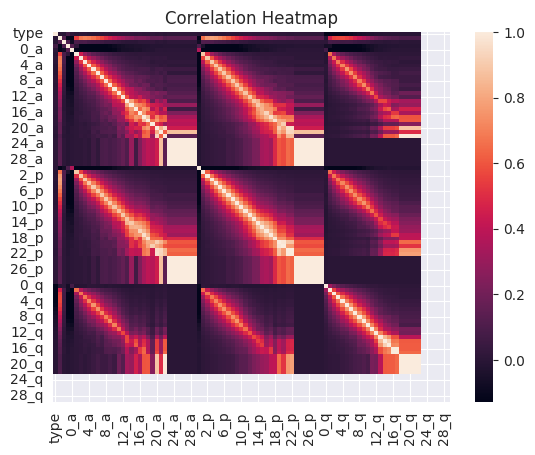

In [567]:
sns.heatmap(stores_data.corr(numeric_only=True), robust=True)
plt.title("Correlation Heatmap")
plt.show()

In [568]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [584]:
stores_data = stores_data.sample(frac=1, random_state=42)

In [585]:
train = stores_data[stores_data.type == 0]
train = train.drop(columns=["type"])
train.reset_index(inplace=True, drop=True)
test = stores_data[stores_data.type == 1]
test = test.drop(columns=["type"])
test.reset_index(inplace=True, drop=True)

In [586]:
test.head(6)

,no_stores,city_nr,mean_quantity_x,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,10_a,11_a,12_a,13_a,14_a,15_a,16_a,17_a,18_a,19_a,20_a,21_a,22_a,23_a,24_a,25_a,26_a,27_a,28_a,29_a,0_p,1_p,2_p,3_p,4_p,5_p,6_p,7_p,8_p,9_p,10_p,11_p,12_p,13_p,14_p,15_p,16_p,17_p,18_p,19_p,20_p,21_p,22_p,23_p,24_p,25_p,26_p,27_p,28_p,29_p,0_q,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,11_q,12_q,13_q,14_q,15_q,16_q,17_q,18_q,19_q,20_q,21_q,22_q,23_q,24_q,25_q,26_q,27_q,28_q,29_q
0,0.033333,0.0,945.649170,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.033333,0.0,721.031799,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033333,0.0,1757.641357,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033333,0.0,2312.391113,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.0,2985.248779,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.769231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.066667,0.0,2817.116211,0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.923077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [587]:
quantity_columns = [f"{i}_q" for i in range(30)]
test.drop(columns=[*quantity_columns, "mean_quantity_x"], inplace=True)

y = train[quantity_columns]
X = train.drop(columns=quantity_columns)

In [588]:
test_len = -int(12583 * 0.75)
X_train = X[test_len:].drop(columns="mean_quantity_x")
X_test = X[:test_len]
X.drop(columns="mean_quantity_x", inplace=True)
mean_quantity = X_test["mean_quantity_x"].values
X_test = X_test.drop(columns="mean_quantity_x")

y_train = y[test_len:]
y_test = y[:test_len]
y_test = y_test.mul(mean_quantity, axis=0).values

test_mask = np.where(y_test[:] != 0)
y_test = y_test[test_mask]

In [589]:
model = Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[-1],)))
model.add(layers.Dense(30, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=320, batch_size=84, verbose=2, validation_split=0.15)

Epoch 1/320
96/96 - 1s - loss: 0.0253 - val_loss: 0.0076 - 735ms/epoch - 8ms/step
Epoch 2/320
96/96 - 0s - loss: 0.0055 - val_loss: 0.0047 - 111ms/epoch - 1ms/step
Epoch 3/320
96/96 - 0s - loss: 0.0042 - val_loss: 0.0039 - 106ms/epoch - 1ms/step
Epoch 4/320
96/96 - 0s - loss: 0.0037 - val_loss: 0.0035 - 104ms/epoch - 1ms/step
Epoch 5/320
96/96 - 0s - loss: 0.0034 - val_loss: 0.0033 - 110ms/epoch - 1ms/step
Epoch 6/320
96/96 - 0s - loss: 0.0032 - val_loss: 0.0031 - 107ms/epoch - 1ms/step
Epoch 7/320
96/96 - 0s - loss: 0.0030 - val_loss: 0.0029 - 108ms/epoch - 1ms/step
Epoch 8/320
96/96 - 0s - loss: 0.0028 - val_loss: 0.0029 - 106ms/epoch - 1ms/step
Epoch 9/320
96/96 - 0s - loss: 0.0027 - val_loss: 0.0027 - 115ms/epoch - 1ms/step
Epoch 10/320
96/96 - 0s - loss: 0.0025 - val_loss: 0.0026 - 120ms/epoch - 1ms/step
Epoch 11/320
96/96 - 0s - loss: 0.0024 - val_loss: 0.0024 - 106ms/epoch - 1ms/step
Epoch 12/320
96/96 - 0s - loss: 0.0023 - val_loss: 0.0023 - 109ms/epoch - 1ms/step
Epoch 13/320


In [590]:
y_pred = model.predict(X_test)
for i, q in enumerate(mean_quantity):
    y_pred[i] *= q
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred[test_mask]))}")

99/99 [==============================] - 0s 763us/step
Mean Squared Error: 119.7736063497464


In [576]:
final_model = Sequential()
final_model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[-1],)))
final_model.add(layers.Dense(30, activation="linear"))

final_model.compile(optimizer="adam", loss="mean_squared_error")
final_model.fit(X, y, epochs=320, batch_size=84, verbose=0)

In [526]:
test_predict = final_model.predict(test)
test_predict

263/263 [==============================] - 0s 746us/step


array([[ 1.1237351e+00,  8.9483511e-01, -1.6850233e-03, ...,
        -4.1404739e-05, -2.8559694e-04,  2.1147635e-04],
       [ 9.9837232e-01,  1.8651262e-02, -7.1521252e-03, ...,
         1.6722875e-04, -1.2469944e-05, -8.5611362e-05],
       [ 9.9837232e-01,  1.8651262e-02, -7.1521252e-03, ...,
         1.6722875e-04, -1.2469944e-05, -8.5611362e-05],
       ...,
       [ 9.9837232e-01,  1.8651262e-02, -7.1521252e-03, ...,
         1.6722875e-04, -1.2469944e-05, -8.5611362e-05],
       [ 1.0009413e+00,  1.3875246e-02, -8.6295009e-03, ...,
         1.4386047e-04,  4.5764958e-05, -7.9031568e-05],
       [ 1.2210687e+00,  7.9926431e-01,  7.1778893e-04, ...,
        -3.8431957e-05, -3.2037427e-04,  2.1397683e-04]], dtype=float32)

In [577]:
test_predict = final_model.predict(test)
result_df = pd.DataFrame({"id": test_ids.flatten(), "quantity": test_predict.flatten()})
result_df = result_df.dropna()
result_df = result_df.merge(mean_quantity_df, how="left", on="id")
result_df.loc[:, "quantity"] *= result_df["mean_quantity_x"]
result_df.loc[result_df["quantity"] < 200, "quantity"] = 200

result_df.drop(columns="mean_quantity_x", inplace=True)
result_df = result_df.astype(np.int32)
result_df.to_csv("result.csv", index=False)

263/263 [==============================] - 0s 690us/step


In [537]:
result_df[result_df["quantity"] < 350]

,id,quantity
355,978,100
494,1389,320
500,1413,324
565,1576,314
589,1635,324
...,...,...
14026,35160,296
14052,35229,267
14085,35309,231
14332,35910,328


In [502]:
base_regressor = RandomForestRegressor(
    max_depth=12,
    random_state=42,
    verbose=1
)
multi_output_regressor = MultiOutputRegressor(base_regressor)
multi_output_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=12,
                                                     random_state=42,
                                                     verbose=1))

In [503]:
y_pred = multi_output_regressor.predict(X_test)
for i, q in enumerate(mean_quantity):
    y_pred[i] *= q
    y_test[i] *= q
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

model_index = 17
specific_model = multi_output_regressor.estimators_[model_index]

feature_importance = specific_model.feature_importances_
feature_names = specific_model.feature_names_in_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features for the specific model
N = 10  # You can change N to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features for Model {}'.format(N, model_index))
plt.gca().invert_yaxis()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Mean Squared Error: 28.390577705979478


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'